# 2. Modelling in Sklearn

Now that we have the train/validate/test datasets in hand we can begin to formulate the ridge regression models.
One bit of trickiness is that sklearn is the commonly used library for fitting machine learning models in python.
There is a lot of type checking and problem modification that makes sklearn highly flexible for model fitting.
While this is great for the user, it can slightly shift the ''practical'' problem away from the mathematical problem.
One example of this is particular for ridge regression, when calling the `.fit(X,y)` method in sklearn is not equivalent to getting raw data $X$, targets $y$ a
nd solving the normal equations.

Thinking forward to fitting Frequent Directions, we will not have any of the sklearn api to use and will only operate on the raw arrays.  Consequently, it is ideal to understand this first from the non-sketched perspective and ensure we have basic functionality to allow correspondence between the mathematical problem and the model setup.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
fpath = 'datasets/'
transformed = np.load(fpath+'transformed_training_set.npy')#np.load(fpath+'train_transformed.npy')
train = np.load(fpath+'train.npy')
valid = np.load(fpath+'validate.npy')
test  = np.load(fpath+'test.npy')

X_tr   , y_tr    = transformed[:,:-1],transformed[:,-1]
X_train, y_train = train[:,:-1], train[:,-1]
X_valid, y_valid = valid[:,:-1], valid[:,-1]
X_test,  y_test   = test[:,:-1], test[:,-1]

print(f'Transformed sizes: {X_tr.shape, y_tr.shape}')
print(f'Training sizes: {X_train.shape, y_train.shape}')
print(f'Validation size: {X_valid.shape, y_valid.shape}')
print(f'Testing size: {X_test.shape, y_test.shape}')

Transformed sizes: ((16512, 16), (16512,))
Training sizes: ((13209, 16), (13209,))
Validation size: ((3303, 16), (3303,))
Testing size: ((4128, 16), (4128,))


In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

Before jumping in to designing our custom solver, let's understand the rough pipeline for sklearn.

**Remark:**
<!-- This is _not_ the most efficient way to perform the following model fitting (`Ridge()`) can take a list of hyperparameters as input.  The problems are then sovled in parallel where possible.  We will avoid this and solve serially for simplicity and consistency with later custom implementation. -->
This is not a like-for-like comparison to the implementation that we will design.  Also the $\alpha$ parameter is the regularisation used for ridge regression.

For consistency with the textbook we will run this part using only the transformed dataset.  This is so that we can allow it to do the folding internally.  

On the other hand, we will explicitly use the train-validation split in our custom estimator to avoid the need for compatibility with the grid search.

In [45]:
param_grid = [
    {'alpha' : [0] + [2**i for i in range(-10,11)]}
]

def mean_square_loss(y_true, y_pred):
    diff = np.linalg.norm(y_true - y_pred)/len(y_true)
    return diff

my_score = make_scorer(mean_square_loss, greater_is_better=False)

In [46]:
ridge = Ridge()
grid_search = GridSearchCV(
            ridge,param_grid,cv=5,
            scoring=make_scorer(mean_square_loss,greater_is_better=False),
            verbose=2,
            return_train_score=True,)
grid_search.fit(X_tr,y_tr)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.0s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.0s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.0s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.0s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.0s
[CV] alpha=0.0009765625 ..............................................
[CV] ............................... alpha=0.0009765625, total=   0.0s
[CV] alpha=0.0009765625 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/charlied/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.34888e-17): result may not be accurate.
  overwrite_a=True).T
/Users/charlied/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.78858e-17): result may not be accurate.
  overwrite_a=True).T
/Users/charlied/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.19155e-17): result may not be accurate.
  overwrite_a=True).T
/Users/charlied/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.06511e-17): result may not be accurate.
  overwrite_a=True).T


[CV] ....................................... alpha=0.25, total=   0.0s
[CV] alpha=0.25 ......................................................
[CV] ....................................... alpha=0.25, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=0.5 .......................................................
[CV] ........................................ alpha=0.5, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0, 0.0009765625, 0.001953125, 0.00390625,
                                    0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                                    0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256,
                                    512, 1024]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(mean_square_loss, greater_is_better=False),
             verbose=2)

Now let's find the optimal parameter and plot the scores.

Text(0, 0.5, 'Training Score')

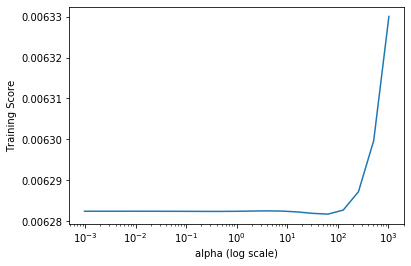

In [74]:
fig,ax=plt.subplots()
ax.plot(param_grid[0]['alpha'][1:],
        np.sqrt(-grid_search.cv_results_['mean_test_score'])[1:])
ax.set_xscale('log')
ax.set_xlabel('alpha (log scale)')
ax.set_ylabel('Training Score')

In [49]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'alpha': 64}
[-3.94659163e-05 -3.94683270e-05 -3.94683235e-05 -3.94683164e-05
 -3.94683025e-05 -3.94682755e-05 -3.94682247e-05 -3.94681351e-05
 -3.94679970e-05 -3.94678446e-05 -3.94678274e-05 -3.94681912e-05
 -3.94689376e-05 -3.94694531e-05 -3.94687681e-05 -3.94661368e-05
 -3.94618098e-05 -3.94594816e-05 -3.94719529e-05 -3.95284329e-05
 -3.96855315e-05 -4.00695845e-05]


/Users/charlied/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.44694e-17): result may not be accurate.
  overwrite_a=True).T


Gamma:0.000E+00		TrainError:5.45382E-03	ValiError:1.18939E-02
Gamma:9.766E-04		TrainError:5.45382E-03	ValiError:1.18939E-02
Gamma:1.953E-03		TrainError:5.45382E-03	ValiError:1.18939E-02
Gamma:3.906E-03		TrainError:5.45381E-03	ValiError:1.18939E-02
Gamma:7.812E-03		TrainError:5.45381E-03	ValiError:1.18939E-02
Gamma:1.562E-02		TrainError:5.45381E-03	ValiError:1.18939E-02
Gamma:3.125E-02		TrainError:5.45380E-03	ValiError:1.18938E-02
Gamma:6.250E-02		TrainError:5.45378E-03	ValiError:1.18938E-02
Gamma:1.250E-01		TrainError:5.45374E-03	ValiError:1.18938E-02
Gamma:2.500E-01		TrainError:5.45367E-03	ValiError:1.18938E-02
Gamma:5.000E-01		TrainError:5.45354E-03	ValiError:1.18937E-02
Gamma:1.000E+00		TrainError:5.45330E-03	ValiError:1.18936E-02
Gamma:2.000E+00		TrainError:5.45289E-03	ValiError:1.18933E-02
Gamma:4.000E+00		TrainError:5.45216E-03	ValiError:1.18930E-02
Gamma:8.000E+00		TrainError:5.45079E-03	ValiError:1.18923E-02
Gamma:1.600E+01		TrainError:5.44816E-03	ValiError:1.18911E-02
Gamma:3.

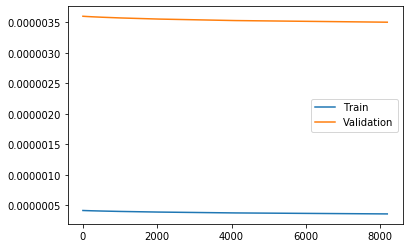

In [75]:
gammas = [0] + [2**i for i in range(-10,14)]
training_errors = np.zeros(len(gammas),dtype=float)
validation_errors = np.zeros_like(training_errors)
test_errors = np.zeros_like(training_errors)
n_train = X_train.shape[0]
for i,gi in enumerate(gammas):
    ridge = Ridge(gi)
    ridge.fit(X_train,y_train[:,np.newaxis])
    y_train_pred = ridge.predict(X_train)
    train_pred_error = np.linalg.norm(y_train_pred - y_train)/len(y_train)
    y_val_pred = ridge.predict(X_valid)
    val_error = np.linalg.norm(y_valid - y_val_pred)/len(y_valid)
    print(f'Gamma:{gi:.3E}\t\tTrainError:{train_pred_error:.5E}\tValiError:{val_error:.5E}')
    training_errors[i] = train_pred_error 
    validation_errors[i] = val_error
training_errors /= len(y_train)
validation_errors /= len(y_valid)
plt.plot(gammas,training_errors,label='Train')
plt.plot(gammas,validation_errors,label='Validation')
plt.legend()

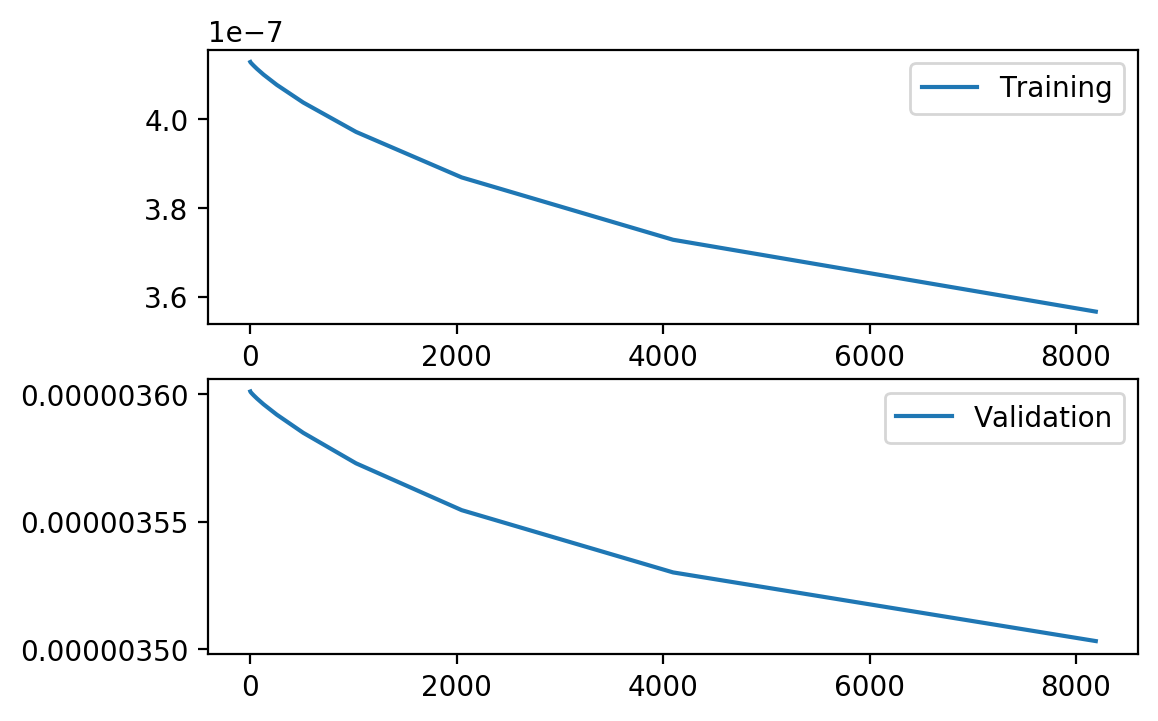

In [76]:
fig, axes = plt.subplots(nrows=2,dpi=200)
ax_t, ax_v = axes
ax_t.plot(gammas,training_errors,label='Training')
ax_v.plot(gammas,validation_errors,label='Validation')
for ax in [ax_t,ax_v]:
    ax.legend()
    #ax.set_yscale('log')

<!-- I don't quite understand what is going on here and this section probably needs more invsertigation.  But let's try to design our own class that should show some tradeoff in using the regularisation parameter. -->

This is the expected behaviour; increasing the regularisation parameter improves the generalisation behaviour of the model.

### 2.1 Designing our own estimator

Now the task is to make our own estimator which mimics this behaviour so that we understand how to make the FD estimator.

In [95]:
def ridge_loss(A,x,y,gamma):
    return (0.5*np.linalg.norm(A@x - y)**2 + 0.5*gamma*np.linalg.norm(x))/len(A)

In [78]:
import scipy.sparse as sp
from scipy import linalg
from scipy import sparse
from scipy.sparse import linalg as sp_linalg

class RidgeRegression:
    def __init__(self,gamma):
        self.gamma = gamma
    
    def _solve_svd(self, X, y, alpha):
        U, s, Vt = linalg.svd(X, full_matrices=False)
        idx = s > 1e-15  # same default value as scipy.linalg.pinv
        s_nnz = s[idx][:, np.newaxis]
        UTy = np.dot(U.T, y)[:,np.newaxis]
        d = np.zeros((s.size, alpha.size), dtype=X.dtype)
        d[idx] = s_nnz / (s_nnz ** 2 + alpha)
        d_UT_y = np.squeeze(d * UTy) # squeeze to a single dimension
        sol = Vt.T@d_UT_y
        return sol#np.dot(Vt.T, d_UT_y)
    
    def _ridge_solve(self, X,y,alpha):
        # There should be either 1 or n_targets penalties
        alpha = np.asarray(alpha, dtype=X.dtype).ravel()
        assert alpha.size == 1
        return self._solve_svd(X,y,alpha)
        
    def _preprocess_data(self,X, y, fit_intercept, normalize=False):
        """Center and scale data.
        Centers data to have mean zero along axis 0. 
        If fit_intercept=False or if
        the X is a sparse matrix, no centering is done, but normalization can still
        be applied. The function returns the statistics necessary to reconstruct
        the input data, which are X_offset, y_offset, X_scale, such that the output
            X = (X - X_offset) / X_scale
        X_scale is the L2 norm of X - X_offset. 
        This is here because nearly all linear models will want their data to be
        centered. This function also systematically makes y consistent with X.dtype
        """
        n,d = X.shape
        self.n_targets = d
        y = np.asarray(y, dtype=X.dtype)
        if fit_intercept:
            X_offset = np.mean(X,axis=0)
            X -= X_offset
            if normalize:
                X_scale = np.linalg.norm(X,axis=0)
            else:
                X_scale = np.ones(X.shape[1], dtype=X.dtype)
            y_offset = np.mean(y,axis=0)
            y = y - y_offset
        else:
            # Return zero arrays for the offsets and ones for the scales
            X_offset = np.zeros(X.shape[1],dtype=X.dtype)
            X_scale = np.ones_like(X_offset)
            if y.ndim == 1:
                y_offset = X.dtype.type(0)
            else:
                y_offset = np.zeros(y.shape[1],dtype=X.dtype)
        return X,y, X_offset, y_offset, X_scale
    
    def _set_intercept(self, X_offset, y_offset, X_scale):
        '''
        Sets the intercept of the model
        '''
        self.coef_ = self.coef_ / X_scale
        self.intercept_ = y_offset - X_offset@self.coef_
    
        
    def fit(self,A,y):
        '''
        Fits the ridge model to gamma (which can be a single float or list/ndarray).
        '''
        n,d = A.shape
        # Centering the arrays for consistency with sklearn.
        X,y,X_offset, y_offset, X_scale = self._preprocess_data(A,y,fit_intercept=True)
        weights = self._ridge_solve(X,y,self.gamma)
        self.coef_ = weights
        self._set_intercept(X_offset, y_offset, X_scale)

    def predict(self,X,weights):
        return X@weights + self.intercept_
    
    def error(self, y_pred, y_true):
        return (1./np.sqrt(len(y_pred)))*np.linalg.norm(y_pred - y_true)
        

In [102]:
gammas = [0] + [2**i for i in range(-10,12)]
training_errors = np.zeros(len(gammas),dtype=float)
training_loss = np.zeros_like(training_errors)
validation_errors = np.zeros_like(training_errors)
validation_loss = np.zeros_like(training_errors)
test_errors = np.zeros_like(training_errors)
for i,gi in enumerate(gammas):
    # Fit the model
    ridge = RidgeRegression(gi)
    ridge.fit(X_train,y_train)
    
    # Get training error and loss
    y_train_pred = ridge.predict(X_train,ridge.coef_)
    train_error = ridge.error(y_train_pred, y_train)
    train_loss = ridge_loss(X_train,ridge.coef_,y_train,gi)
    
    # Validation error and loss
    y_train_val = ridge.predict(X_valid,ridge.coef_)
    valid_error = ridge.error(y_train_val, y_valid)
    valid_loss = ridge_loss(X_valid,ridge.coef_,y_valid,gi)
    
    print(f'Gamma:{gi:.3E}\tTrainError:{train_error:.5E}\tValidError:{valid_error:.5E}\tTrainLoss:{train_loss:.5E}\tValidLoss:{valid_loss:.5E}')
    training_errors[i] = train_error
    training_loss[i] = train_loss
    validation_errors[i] = valid_error
    validation_loss[i] = valid_loss
#plt.plot(gammas,training_errors)

Gamma:0.000E+00	TrainError:2.51322E-03	ValidError:3.64806E+09	TrainLoss:3.19989E-05	ValidLoss:6.65418E+18
Gamma:9.766E-04	TrainError:2.51322E-03	ValidError:1.06197E-02	TrainLoss:3.19963E-05	ValidLoss:1.51168E-04
Gamma:1.953E-03	TrainError:2.51322E-03	ValidError:1.06194E-02	TrainLoss:3.19965E-05	ValidLoss:1.51163E-04
Gamma:3.906E-03	TrainError:2.51322E-03	ValidError:1.06187E-02	TrainLoss:3.19970E-05	ValidLoss:1.51152E-04
Gamma:7.812E-03	TrainError:2.51322E-03	ValidError:1.06174E-02	TrainLoss:3.19980E-05	ValidLoss:1.51131E-04
Gamma:1.562E-02	TrainError:2.51322E-03	ValidError:1.06149E-02	TrainLoss:3.20000E-05	ValidLoss:1.51088E-04
Gamma:3.125E-02	TrainError:2.51322E-03	ValidError:1.06099E-02	TrainLoss:3.20039E-05	ValidLoss:1.51003E-04
Gamma:6.250E-02	TrainError:2.51322E-03	ValidError:1.06000E-02	TrainLoss:3.20117E-05	ValidLoss:1.50838E-04
Gamma:1.250E-01	TrainError:2.51322E-03	ValidError:1.05810E-02	TrainLoss:3.20270E-05	ValidLoss:1.50520E-04
Gamma:2.500E-01	TrainError:2.51322E-03	ValidEr

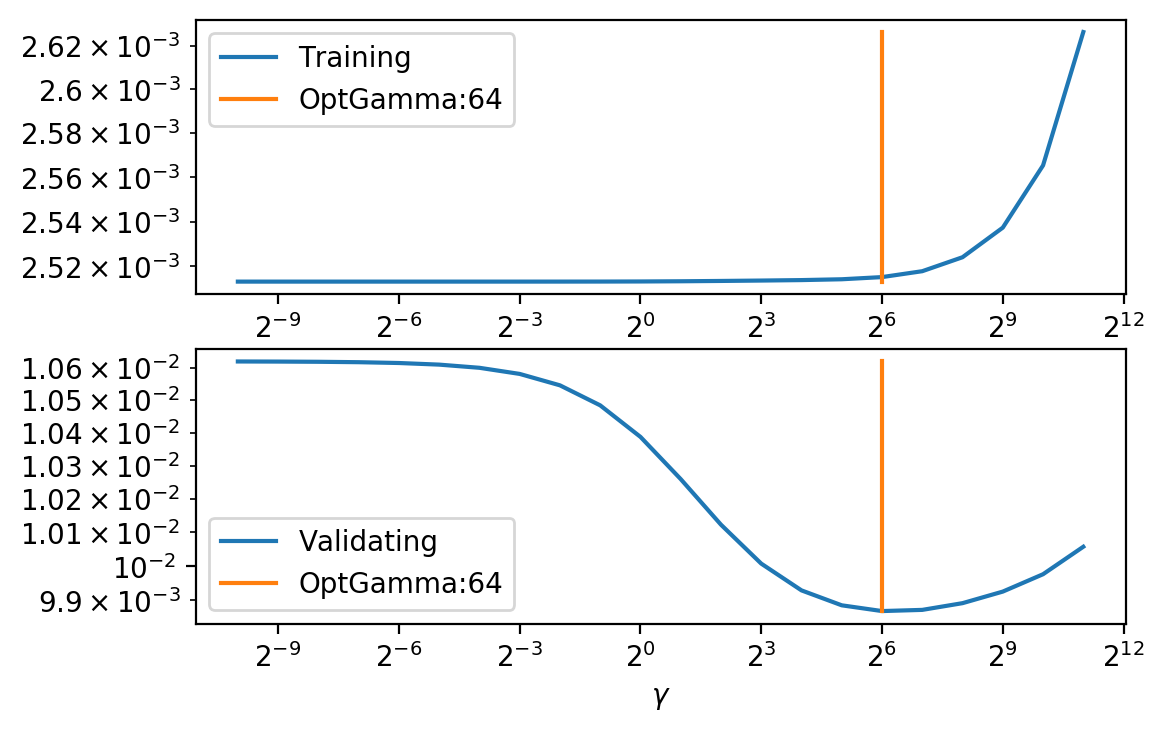

In [107]:
# Optimal regularisation:
opt_gamma = gammas[np.argmin(validation_errors[1:])+1]

fig, axes = plt.subplots(nrows=2,dpi=200)
ax_t, ax_v = axes
ax_t.plot(gammas[1:],training_errors[1:],label='Training')
#ax_t.plot([opt_gamma,opt_gamma],[training_errors[1:].min(),training_errors[1:].max()],label=f'OptGamma:{opt_gamma}')
ax_v.plot(gammas[1:],validation_errors[1:],label='Validating')

for ax in [ax_t,ax_v]:
    if ax == ax_t:
        val_min, val_max = training_errors[1:].min(),training_errors[1:].max()
    else:
        val_min, val_max = validation_errors[1:].min(),validation_errors[1:].max()
    ax.plot([opt_gamma,opt_gamma],[val_min, val_max],label=f'OptGamma:{opt_gamma}')
    ax.set_yscale('log')
    ax.set_xscale('log',basex=2)
    ax.set_xlabel(r'$\gamma$')
    ax.legend()

Now that we have an estimator implemented roughly, we can begin to follow Section 2.1 for the FD method.